In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\train_NIR5Yl1.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\test_8i3B3FC.csv")

In [3]:
labelencoder_X = LabelEncoder()

df1['Tag'] = labelencoder_X.fit_transform(df1['Tag'])


bn = Binarizer(threshold=7)
pd_watched = bn.transform([df1['Answers']])[0]
df1['pd_watched'] = pd_watched



df1 = df1.drop(["ID","Username","Answers"],axis = 1)

In [4]:
df1.head()

,Tag,Reputation,Views,Upvotes,pd_watched
0,0,3942.0,7855.0,42.0,0.0
1,0,26046.0,55801.0,1175.0,1.0
2,1,1358.0,8067.0,60.0,0.0
3,0,264.0,27064.0,9.0,0.0
4,1,4271.0,13986.0,83.0,0.0


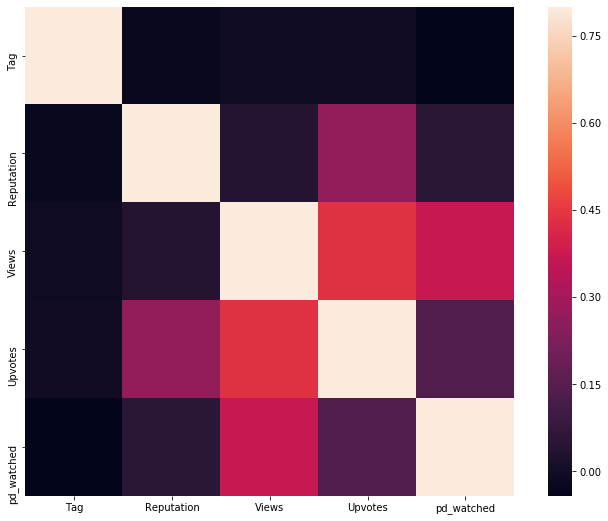

In [5]:
#saleprice correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

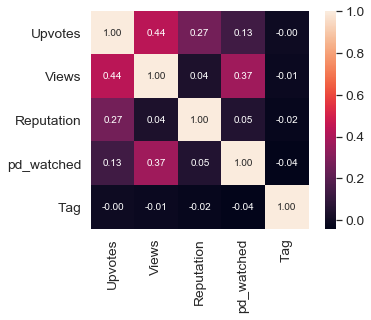

In [6]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Upvotes')['Upvotes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df1["Views_log"]=np.log1p(df1["Views"])

df1["Reputation_log"]=np.log1p(df1["Reputation"])

df1["pd_watched_log"]=np.log1p(df1["pd_watched"])

df1["Tag_log"]=np.log1p(df1["Tag"])

df1["Views_sqrt"]=np.sqrt(df1["Views"])

df1["Reputation_sqrt"]=np.sqrt(df1["Reputation"])

df1["pd_watched_sqrt"]=np.sqrt(df1["pd_watched"])

df1["Tag_sqrt"]=np.sqrt(df1["Tag"])





In [8]:
df1.head()

,Tag,Reputation,Views,Upvotes,pd_watched,Views_log,Reputation_log,pd_watched_log,Tag_log,Views_sqrt,Reputation_sqrt,pd_watched_sqrt,Tag_sqrt
0,0,3942.0,7855.0,42.0,0.0,8.969033,8.279697,0.000000,0.000000,88.628438,62.785349,0.0,0.0
1,0,26046.0,55801.0,1175.0,1.0,10.929565,10.167658,0.693147,0.000000,236.222353,161.387732,1.0,0.0
2,1,1358.0,8067.0,60.0,0.0,8.995661,7.214504,0.000000,0.693147,89.816480,36.851052,0.0,1.0
3,0,264.0,27064.0,9.0,0.0,10.205997,5.579730,0.000000,0.000000,164.511398,16.248077,0.0,0.0
4,1,4271.0,13986.0,83.0,0.0,9.545884,8.359837,0.000000,0.693147,118.262420,65.352888,0.0,1.0


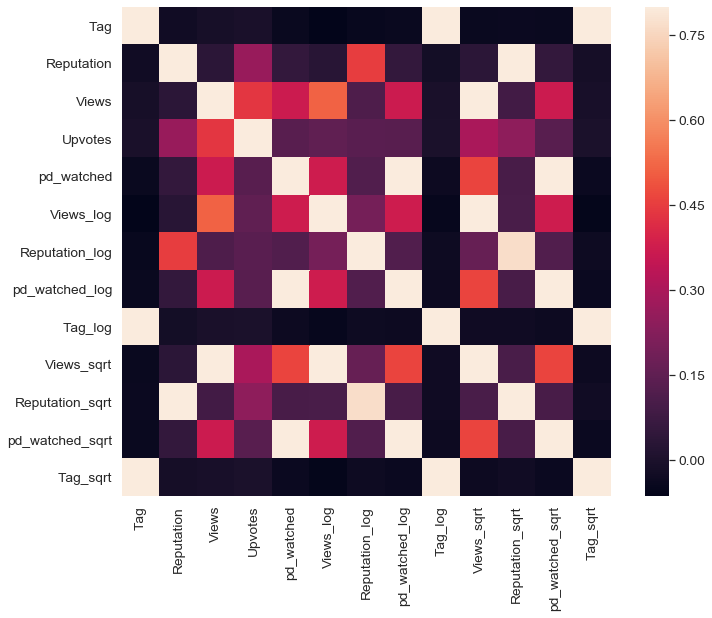

In [9]:
#saleprice correlation matrix
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

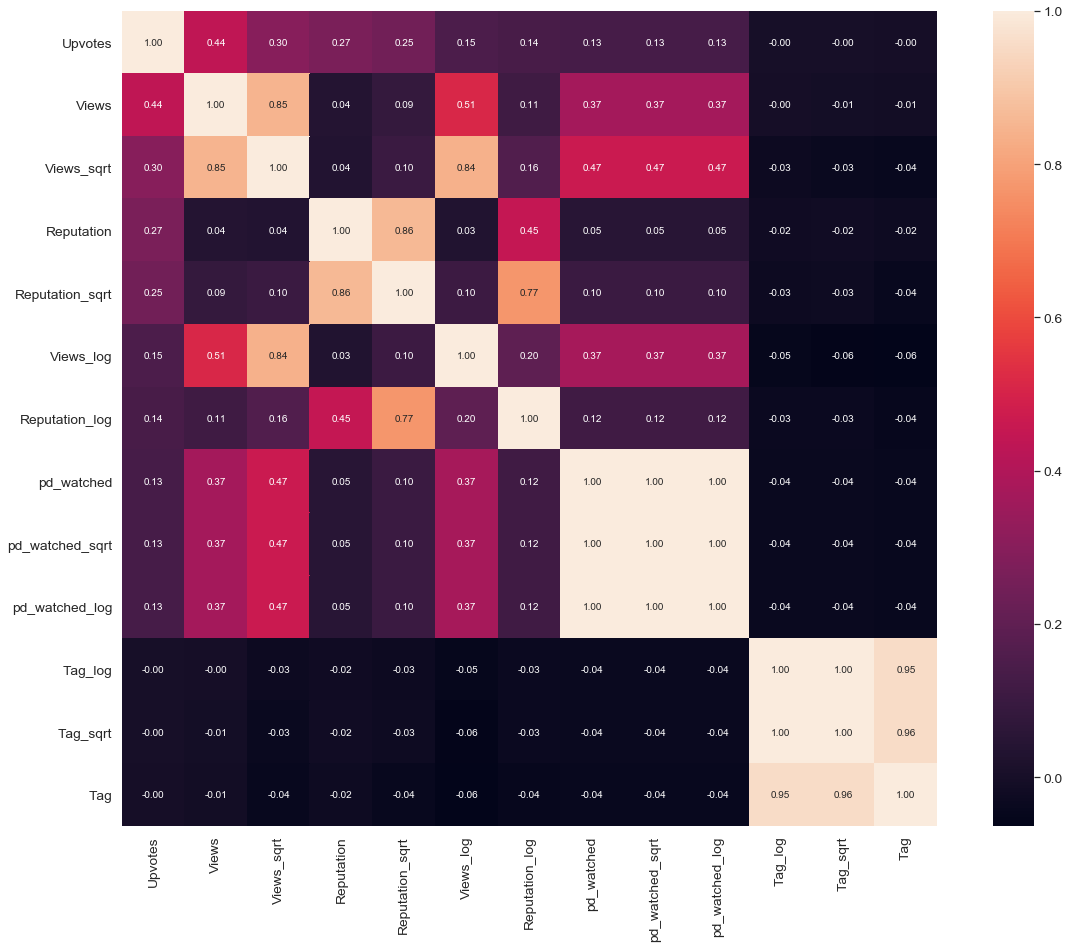

In [10]:
plt.figure(figsize=(20,15))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Upvotes')['Upvotes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
df1["Upvotes_log"]=np.log1p(df1["Upvotes"])

df1["Upvotes_sqrt"]=np.sqrt(df1["Upvotes"])

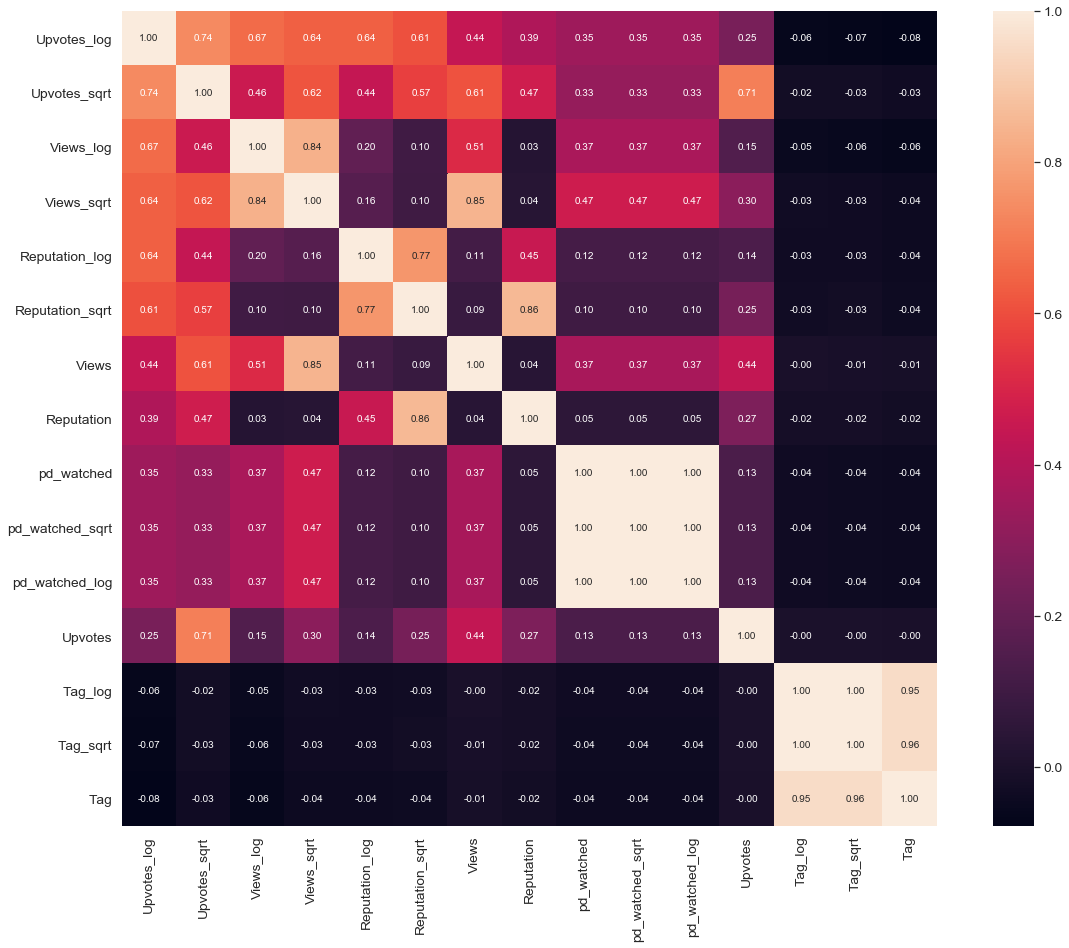

In [12]:
corrmat = df1.corr()
plt.figure(figsize=(20,15))
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Upvotes_log')['Upvotes_log'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
df3=pd.DataFrame()
df3["Upvotes"]=df1["Upvotes_log"]
df3["Views"]=df1["Views_log"]
df3["Reputation"]=df1["Reputation_log"]
df3["pd_watched"]=df1["pd_watched_sqrt"]

In [14]:
df3.head()

,Upvotes,Views,Reputation,pd_watched
0,3.761200,8.969033,8.279697,0.0
1,7.069874,10.929565,10.167658,1.0
2,4.110874,8.995661,7.214504,0.0
3,2.302585,10.205997,5.579730,0.0
4,4.430817,9.545884,8.359837,0.0


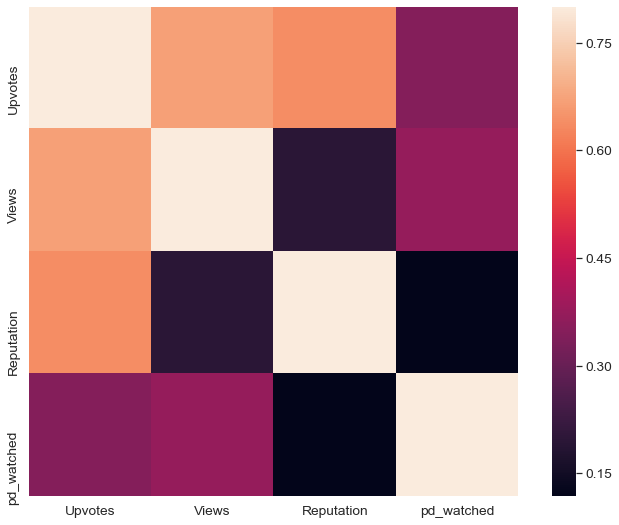

In [15]:
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

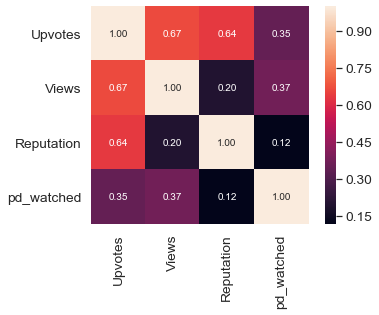

In [16]:
k = 4 #number of variables for heatmap
corrmat = df3.corr()
cols = corrmat.nlargest(k, 'Upvotes')['Upvotes'].index
cm = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
target=df3["Upvotes"]
df3=df3.drop(["Upvotes"],axis=1)


In [18]:
target.head()

0    3.761200
1    7.069874
2    4.110874
3    2.302585
4    4.430817
Name: Upvotes, dtype: float64

In [19]:
X_train,X_test,y_train,y_test=ms.train_test_split(df3,target,test_size=0.30,random_state=42)

In [20]:
"""
#Standard Scaling to bring the data to mean zero 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

"""

'\n#Standard Scaling to bring the data to mean zero \nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n\n'

In [21]:
#Polynomial Regression
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.009,max_iter=200)
lin_reg_1.fit(X_poly, y_train)
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))


mse = sklearn.metrics.mean_squared_error(y_test, pred_val)
rmse = math.sqrt(mse)
print(rmse)

-1.93352626776111e-06
1.8411189263377172


In [22]:
#ElasticSearch
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.6561125870865989
1.07966634173198


In [23]:
#Lasso Regression
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.5895111694607855
1.179592750533388


In [24]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.7202684324854922
0.9737605189159927


In [25]:
#Ransac  Regression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(y_test, pred)
rmse = math.sqrt(mse)
print(rmse)

0.6749829389622762
1.0496258117667814
